<a href="https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Lectures/L4.1-api-stocks.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# Lecture notes - Stockdata 1 - API
---

This is a lecture note on stock data from API - but it's built upon contents from pandas and previous course:

- Python programming

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to merging. I encourage you to read further about API.

Read more

- [video - API-key .env](https://www.youtube.com/watch?v=YdgIWTYQ69A)
- [wikipedia - REST API theory](https://en.wikipedia.org/wiki/Representational_state_transfer)
- [video - Python - requests](https://www.youtube.com/watch?v=tb8gHvYlCFs)
- [w3schools - requests](https://www.w3schools.com/python/module_requests.asp)

---


## Stocks API

Go into [Alpha Vantage](https://www.alphavantage.co/documentation/) and read the documentation of the time series APIs

- Go into [claim API key](https://www.alphavantage.co/support/#api-key) and fill in the form to claim your free API-key

- You will be using the API key to access stock data

- Create a file called .env and type:

```py
ALPHA_API_KEY = ...
```

- the dots should be your API key
- go into your .gitignore file in your repo and make sure that there is .env there so that you don't push the .env file to a public Github repo where anyone can access your key and do stuffs in your name

**Setup**

- pipenv install python-dotenv

[Symbols of stocks](https://www.nasdaq.com/market-activity/stocks/screener) that is useful for get-request


In [3]:
import os
from dotenv import load_dotenv
import requests
import pandas as pd

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
# NOTE: you can print it for your own validation, but remove the print before pushing to Github

symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
stock_list = []

for symbol in symbols:
    function = "TIME_SERIES_DAILY"

    url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}&outputsize=full'
    data = requests.get(url).json()
    df = pd.DataFrame(data["Time Series (Daily)"]).transpose()
    df = df["4. close"].rename(symbol).astype(float)
    stock_list.append(df)


In [7]:
#data["Time Series (Daily)"]

In [8]:
# concatenate the list of series to a df
stocks = pd.concat(stock_list, axis=1)
stocks


,AAPL,NVDA,TSLA,IBM
2022-10-13,142.99,119.60,221.72,121.79
2022-10-12,138.34,115.00,217.24,117.57
2022-10-11,138.98,115.86,216.50,117.80
2022-10-10,140.42,116.70,222.96,117.75
2022-10-07,140.09,120.76,223.07,118.82
...,...,...,...,...
1999-11-05,88.31,28.25,NaN,90.25
1999-11-04,83.62,29.19,NaN,91.56
1999-11-03,81.50,27.44,NaN,94.37
1999-11-02,80.25,25.00,NaN,94.81


In [9]:
import plotly_express as px

# initial plot
px.line(stocks, x=stocks.index, y=[
        "AAPL", "NVDA", "TSLA", "IBM"],
        labels={"variable": "Stock", "index": "Year", "value": "Value $"},
        title="Some stocks", log_y=True)


---
## Working with time series


In [10]:
print(stocks.index.dtype)
# type cast index from object to datetime
stocks.index = pd.to_datetime(stocks.index)
print(stocks.index.dtype)
stocks.head()


object
datetime64[ns]


,AAPL,NVDA,TSLA,IBM
2022-10-13,142.99,119.60,221.72,121.79
2022-10-12,138.34,115.00,217.24,117.57
2022-10-11,138.98,115.86,216.50,117.80
2022-10-10,140.42,116.70,222.96,117.75
2022-10-07,140.09,120.76,223.07,118.82


In [11]:
stocks.loc["2020"]  # gives all data where year is 2020


,AAPL,NVDA,TSLA,IBM
2020-12-31,132.69,522.20,705.67,125.88
2020-12-30,133.72,525.83,694.78,124.34
2020-12-29,134.87,517.73,665.99,123.80
2020-12-28,136.69,516.00,663.69,124.82
2020-12-24,131.97,519.75,661.77,124.69
...,...,...,...,...
2020-01-08,303.19,240.38,492.14,135.31
2020-01-07,298.39,239.93,469.06,134.19
2020-01-06,299.80,237.06,451.54,134.10
2020-01-03,297.43,236.07,443.01,134.34


In [12]:
stocks.loc["2021-10"]  # gives all rows for this month


,AAPL,NVDA,TSLA,IBM
2021-10-29,149.80,255.67,1114.00,125.10
2021-10-28,152.57,249.41,1077.04,125.84
2021-10-27,148.85,244.51,1037.86,125.17
2021-10-26,149.32,247.17,1018.43,127.13
2021-10-25,148.64,231.66,1024.86,127.64
2021-10-22,148.69,227.26,909.68,127.88
2021-10-21,149.48,226.92,894.00,128.33
2021-10-20,149.26,221.03,865.80,141.90
2021-10-19,148.76,222.90,864.27,141.98
2021-10-18,146.55,222.22,870.11,142.32


In [13]:
from datetime import datetime, timedelta
now = datetime.now()
# last seven days
last_week = (now - timedelta(7)).strftime("%Y-%m-%d")
now = str(now.date())

# solve deprecation warning: 
# https://stackoverflow.com/questions/66116893/iterating-through-dictionaries-futurewarning-value-based-partial-slicing-on-n

stocks.sort_index().loc[last_week:now]


,AAPL,NVDA,TSLA,IBM
2022-10-07,140.09,120.76,223.07,118.82
2022-10-10,140.42,116.70,222.96,117.75
2022-10-11,138.98,115.86,216.50,117.80
2022-10-12,138.34,115.00,217.24,117.57
2022-10-13,142.99,119.60,221.72,121.79


---
## Plot 4 stocks in subplots


array([[<AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >]], dtype=object)
array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)


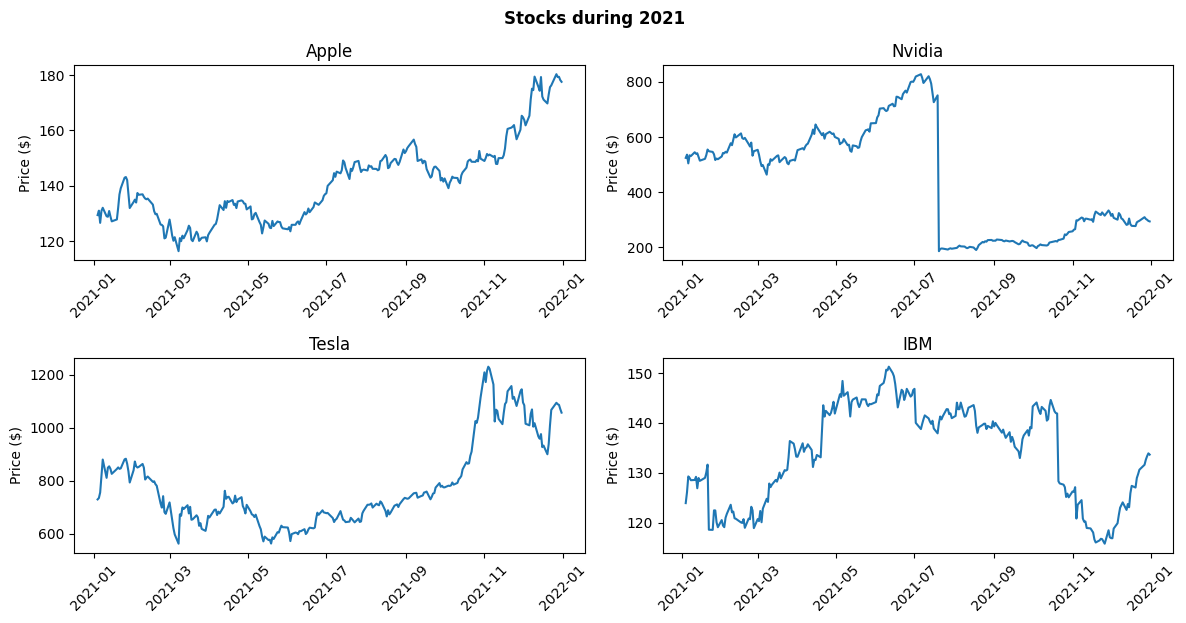

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, dpi=100, figsize=(12,6))

# 2D array -> 2D array has a method flatten() to create a numpy flattened array
print(repr(axes))
print(repr(axes.flatten()))

stock_names = {"AAPL": "Apple", "NVDA": "Nvidia",
               "TSLA": "Tesla", "IBM": "IBM"}

stocks_2021 = stocks.loc["2021"]

for ax, symbol in zip(axes.flatten(), stock_names):
    sns.lineplot(data=stocks_2021, x=stocks_2021.index, y=symbol, ax=ax)
    ax.tick_params(axis="x", rotation=45)
    ax.set(title=f"{stock_names[symbol]}", ylabel="Price ($)")
    #ax.grid()

fig.tight_layout()
fig.suptitle("Stocks during 2021", y=1.03, fontweight="bold");

---
## Download csv

In [17]:
import time

symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
stock_list = []

for symbol in symbols:
    for function, time_column in zip(["TIME_SERIES_DAILY", "TIME_SERIES_INTRADAY_EXTENDED"], ["timestamp", "time"]):
        url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}&datatype=csv&outputsize=full&interval=60min"

        df = pd.read_csv(url)
        df.set_index(df[time_column], inplace=True)
        df.index = pd.to_datetime(df.index)
        df.drop(time_column, axis=1, inplace=True)
        df.to_csv(f"../Data/Stocksdata/{symbol}_{function}.csv")

        # to not overload API
        time.sleep(15)

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---
